In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [40]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import cv2
import os
import tensorflow as tf
import numpy as np

##Preparing Data

In [4]:
train_dir = './data/Multi-class_Weather/'
img_size = 224
batch_size = 64

In [13]:
os.listdir(train_dir)

['Shine', 'Rain', 'Sunrise', 'Cloudy']

In [14]:
labels2idx = {v:i for i, v in enumerate(os.listdir(train_dir))}

In [23]:
data = []
labels =[]
for i in labels2idx.keys():
  for path in os.listdir(train_dir+i):
    
    img = cv2.imread(train_dir+i+'/'+path)
    try:
      img = cv2.resize(img,(224,224),interpolation = cv2.INTER_AREA)
      img = np.array(img,dtype=np.uint8)
      data.append(img)
      labels.append(labels2idx[i])
    except:
      print(train_dir+i+'/'+path)

np.array(data)
np.array(labels)

./data/Multi-class_Weather/Shine/shine131.jpg
./data/Multi-class_Weather/Rain/rain141.jpg


(array([252.,   0., 214.,   0.,   0., 357.,   0., 300.]),
 array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875, 2.25 , 2.625, 3.   ]),
 <a list of 8 Patch objects>)

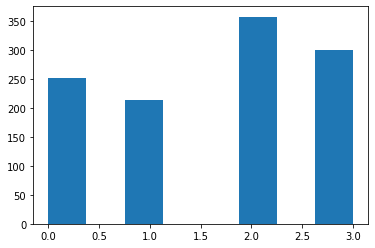

In [34]:
plt.hist(labels,bins=8)

In [55]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

In [35]:
x_train = data.astype('float32')/255.0

In [41]:
labels = to_categorical(labels, num_classes = 4)

In [42]:
labels.shape

(1123, 4)

In [43]:
train_x, test_x, train_y, test_y = train_test_split(x_train, labels,test_size=0.1, shuffle = True)

In [44]:
print(f'Shape of train: {(train_x.shape,test_x.shape)}\n Shape of test:{(train_y.shape, test_y.shape)}')

Shape of train: ((1010, 224, 224, 3), (113, 224, 224, 3))
 Shape of test:((1010, 4), (113, 4))


##Building CNN Model

In [50]:
model = Sequential()


model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(img_size,img_size,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))



model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer='l2'))
model.add(Dropout(0.3))


# Fully connected layer 2nd layer

model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
activation_10 (Activation)   (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
activation_11 (Activation)   (None, 112, 112, 64)     

In [51]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [66]:

history = model.fit(datagen.flow(train_x, train_y,subset='training'), batch_size=64,verbose=1, 
                    epochs = 40,validation_data=datagen.flow(train_x, train_y,subset='validation')
)

Epoch 1/40
29/29 [==============================] - 12s 398ms/step - loss: 0.4692 - accuracy: 0.9043 - val_loss: 0.4489 - val_accuracy: 0.9010
Epoch 2/40
29/29 [==============================] - 11s 375ms/step - loss: 0.4362 - accuracy: 0.9032 - val_loss: 0.9219 - val_accuracy: 0.7624
Epoch 3/40
29/29 [==============================] - 10s 361ms/step - loss: 0.4485 - accuracy: 0.8955 - val_loss: 0.7304 - val_accuracy: 0.8317
Epoch 4/40
29/29 [==============================] - 11s 362ms/step - loss: 0.3516 - accuracy: 0.9098 - val_loss: 1.4324 - val_accuracy: 0.6139
Epoch 5/40
29/29 [==============================] - 10s 364ms/step - loss: 0.3911 - accuracy: 0.8966 - val_loss: 0.3262 - val_accuracy: 0.9307
Epoch 6/40
29/29 [==============================] - 11s 376ms/step - loss: 0.3354 - accuracy: 0.9120 - val_loss: 0.7048 - val_accuracy: 0.8812
Epoch 7/40
29/29 [==============================] - 11s 384ms/step - loss: 0.3583 - accuracy: 0.9197 - val_loss: 1.4895 - val_accuracy: 0.6634

In [67]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 34ms/step - loss: 0.4621 - accuracy: 0.9204


[0.4620574116706848, 0.9203540086746216]

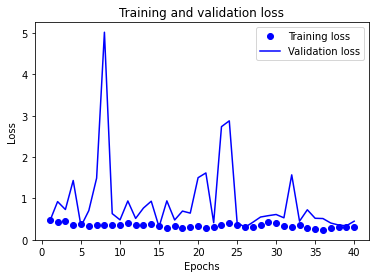

In [68]:
loss = history .history['loss']
val_loss = history .history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

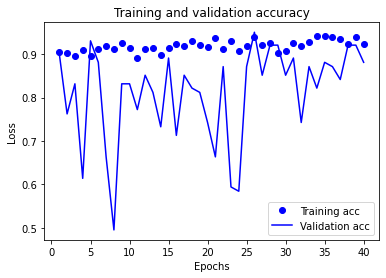

In [69]:
plt.clf()   # clear figure

acc = history .history['accuracy']
val_acc = history .history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##Transfer Learning

In [81]:
with tf.device('/gpu:0'):
    
    base_model = tf.keras.applications.resnet50.ResNet50(input_shape=(224,224,3),
                                               include_top=False, 
                                               weights='imagenet')
    
    
    model = tf.keras.Sequential([
      base_model,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
    ])

    base_model.trainable = False
    rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, mode='max', patience=5, min_lr=1e-8, verbose=1)
    mcp = tf.keras.callbacks.ModelCheckpoint("Resnet50.h5", monitor="val_accuracy",
                      save_best_only=True, save_weights_only=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    

    history = model.fit(datagen.flow(train_x, train_y,subset='training'), batch_size=64,verbose=1, 
                    epochs = 10,validation_data=datagen.flow(train_x, train_y,subset='validation'),
                    callbacks=[mcp,rlr])

    base_model.trainable = True

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    

    history = model.fit(datagen.flow(train_x, train_y,subset='training'), batch_size=64,verbose=1, 
                    epochs = 50,validation_data=datagen.flow(train_x, train_y,subset='validation'),
                    callbacks = [mcp,rlr])

Epoch 1/10
29/29 [==============================] - 15s 428ms/step - loss: 1.9260 - accuracy: 0.2354 - val_loss: 1.3873 - val_accuracy: 0.2673
Epoch 2/10
29/29 [==============================] - 11s 375ms/step - loss: 1.3793 - accuracy: 0.2541 - val_loss: 1.3827 - val_accuracy: 0.3564
Epoch 3/10
29/29 [==============================] - 11s 374ms/step - loss: 1.3787 - accuracy: 0.3080 - val_loss: 1.3823 - val_accuracy: 0.3564
Epoch 4/10
29/29 [==============================] - 11s 361ms/step - loss: 1.3714 - accuracy: 0.3080 - val_loss: 1.3850 - val_accuracy: 0.3564
Epoch 5/10
29/29 [==============================] - 11s 366ms/step - loss: 1.3796 - accuracy: 0.3014 - val_loss: 1.3850 - val_accuracy: 0.3564
Epoch 6/10
29/29 [==============================] - 11s 387ms/step - loss: 1.3708 - accuracy: 0.3080 - val_loss: 1.3850 - val_accuracy: 0.3564
Epoch 7/10
29/29 [==============================] - 11s 385ms/step - loss: 1.3704 - accuracy: 0.3080 - val_loss: 1.3824 - val_accuracy: 0.3564

In [82]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 1s 92ms/step - loss: 0.2027 - accuracy: 0.9292


[0.2027352750301361, 0.9292035102844238]

In [77]:
with tf.device('/gpu:0'):
    
    base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(224,224,3),
                                               include_top=False, 
                                               weights='imagenet')
    
    
    model = tf.keras.Sequential([
      base_model,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
    ])

    base_model.trainable = False
    rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, mode='max', patience=5, min_lr=1e-8, verbose=1)
    mcp = tf.keras.callbacks.ModelCheckpoint("InceptionV3.h5", monitor="val_accuracy",
                      save_best_only=True, save_weights_only=True)
    
   
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    
    history = model.fit(datagen.flow(train_x, train_y,subset='training'), batch_size=64,verbose=1, 
                    epochs = 10,validation_data=datagen.flow(train_x, train_y,subset='validation'),
                    callbacks=[mcp,rlr])
    

    base_model.trainable = True
    
  
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
   
    history = model.fit(datagen.flow(train_x, train_y,subset='training'), batch_size=64,verbose=1, 
                    epochs = 50,validation_data=datagen.flow(train_x, train_y,subset='validation'),
                    callbacks = [mcp])

Epoch 1/10
29/29 [==============================] - 15s 407ms/step - loss: 4.0033 - accuracy: 0.5479 - val_loss: 0.6217 - val_accuracy: 0.7426
Epoch 2/10
29/29 [==============================] - 11s 367ms/step - loss: 0.4322 - accuracy: 0.8405 - val_loss: 0.4194 - val_accuracy: 0.8317
Epoch 3/10
29/29 [==============================] - 11s 368ms/step - loss: 0.3088 - accuracy: 0.8933 - val_loss: 0.3640 - val_accuracy: 0.8713
Epoch 4/10
29/29 [==============================] - 11s 393ms/step - loss: 0.2792 - accuracy: 0.8988 - val_loss: 0.4345 - val_accuracy: 0.8713
Epoch 5/10
29/29 [==============================] - 11s 389ms/step - loss: 0.3158 - accuracy: 0.8878 - val_loss: 0.4358 - val_accuracy: 0.8713
Epoch 6/10
29/29 [==============================] - 11s 370ms/step - loss: 0.2559 - accuracy: 0.9032 - val_loss: 0.4261 - val_accuracy: 0.8614
Epoch 7/10
29/29 [==============================] - 10s 360ms/step - loss: 0.2125 - accuracy: 0.9175 - val_loss: 0.2683 - val_accuracy: 0.9208

In [78]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 2s 78ms/step - loss: 0.1049 - accuracy: 0.9558


[0.10494951158761978, 0.9557521939277649]